This one works for Streifen

In [1]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt 
plt.gray()


<Figure size 640x480 with 0 Axes>

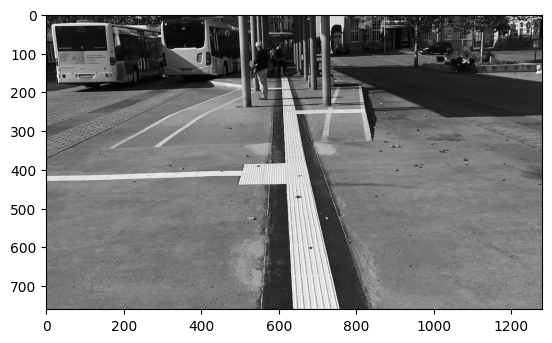

In [2]:
img = cv2.imread("Test_Bilder/streifen_1.png",0)
plt.imshow(img)

derx=cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=1)
dery=cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=1)
gradmag=np.sqrt(derx**2 + dery**2)
plt.imshow(gradmag > 80)
gradmag_w = (gradmag > 80).astype('uint8')


linesh = cv2.HoughLinesP(gradmag_w, 1, np.pi/180, 60,
                        minLineLength=10, maxLineGap=50)

lines=np.squeeze(linesh)
img_rgb = cv2.merge((img, img, img))
for (x1,y1,x2,y2) in lines:
    cv2.line(img_rgb, (x1,y1), (x2,y2), (255,0,0))
plt.imshow(img_rgb)




# sobel filter 
# sobel = np.abs(cv2.Sobel(img,cv2.CV_16S ,1 ,0))
# plt.imshow(sobel)
# points = cv2.findNonZero(sobel)
# # for coord in points:
# #         x, y = coord[0]
# #         print(f"Non-zero pixel at ({x}, {y})")
# img_rgb = cv2.merge((img,img,img))
# sobel_ = cv2.drawContours(img_rgb, points, -1, (255, 0, 0), thickness=cv2.FILLED)
# plt.imshow(sobel_)
# lapl = cv2.Laplacian(img, cv2.CV_64F,ksize=31)
# plt.imshow(lapl)

derx=cv2.Sobel(img, cv2.CV_32F, 1, 0,)
dery=cv2.Sobel(img, cv2.CV_32F, 0, 1,)
gradmag=np.sqrt(derx**2 + dery**2)
plt.imshow(gradmag > 250)
gradmag_w = (gradmag > 250).astype('uint8')


linesh = cv2.HoughLinesP(gradmag_w, 1, np.pi/180, 60,
                        minLineLength=10, maxLineGap=50)

lines=np.squeeze(linesh)
img_rgb = cv2.merge((img, img, img))
for (x1,y1,x2,y2) in lines:
    cv2.line(img_rgb, (x1,y1), (x2,y2), (255,0,0))
plt.imshow(img_rgb)



img_rgb = cv2.merge((img, img, img))
lines = cv2.HoughLines(gradmag_w, 1, np.pi/180, threshold=100)

# Find parallel lines
parallel_lines = []
if lines is not None:
    for i in range(len(lines)):
        for j in range(i+1, len(lines)):
            rho1, theta1 = lines[i][0]
            rho2, theta2 = lines[j][0]
            angle_diff = np.abs(theta1 - theta2)
            if angle_diff < np.pi/18 or angle_diff > np.pi - np.pi/18:
                parallel_lines.append((rho1, theta1))
                parallel_lines.append((rho2, theta2))

# Print the parallel lines
for line in parallel_lines:
    rho, theta = line
    print(f"Rho: {rho}, Theta: {theta}")

# Display the image with detected lines
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(img_rgb, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.imshow(img_rgb)

# get parallel lines after houghtransformp
line_m =[]
parallel_lines = []
for (x1, y1, x2, y2) in lines:
    dx = x2-x1
    dy = y2-y1
    if dx !=0 and dy != 0: 
        m = (dx)/(dy)
    line_m.append(m)
uni, counts  = np.unique(line_m, return_counts=True)
dupl = uni[counts > 1]
dupl_line = []
for m in line_m:
    ind = np.where(m == dupl)
    if ind[0].size != 0:
        dupl_line.append(ind[0])
dupl_line_s = np.unique(dupl_line)
lines_end = lines[dupl_line_s]
lines_end
% plot the lines 
img_rgb = cv2.merge((img, img, img))
for (x1,y1,x2,y2) in lines_end:
    cv2.line(img_rgb, (x1,y1), (x2,y2), (255,0,0))
plt.imshow(img_rgb)

img_rgb = cv2.merge((img, img, img))
for (x1,y1,x2,y2) in lines_end:
    cv2.line(img_rgb, (x1,y1), (x2,y2), (255,0,0))
plt.imshow(img_rgb)

img = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
linesh = cv2.HoughLinesP(img, 1, np.pi/180, 60,
                        minLineLength=10, maxLineGap=50)


lines=np.squeeze(linesh)
img_rgb = cv2.merge((img, img, img))
for (x1,y1,x2,y2) in lines:
    cv2.line(img_rgb, (x1,y1), (x2,y2), (255,0,0))
plt.imshow(img_rgb)

#grabcut
mask = np.zeros(img.shape, dtype='uint8')
rect = ()
grab = cv2.grabCut(img,mask=mask, mode=cv2.GC_INIT_WITH_RECT, iterCount=10)

#bw_new = cv2.erode(gradmag_w ,np.ones((2,2)), iterations=1)
bw_new2 = cv2.dilate(gradmag_w ,np.ones((2,2)), iterations=10)
plt.imshow(bw_new2)

# canny = cv2.Canny(gradmag_w, 0, 0)
# plt.imshow(canny)

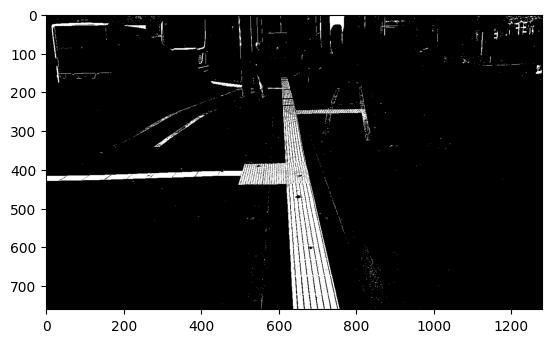

In [3]:
#gauss = cv2.GaussianBlur(img, None, 2)
#plt.imshow(gauss)
#plt.hist(img.flatten(), bins=255)
t, seg = cv2.threshold(img,200,1,cv2.THRESH_BINARY) #streifen = 200
plt.imshow(seg)


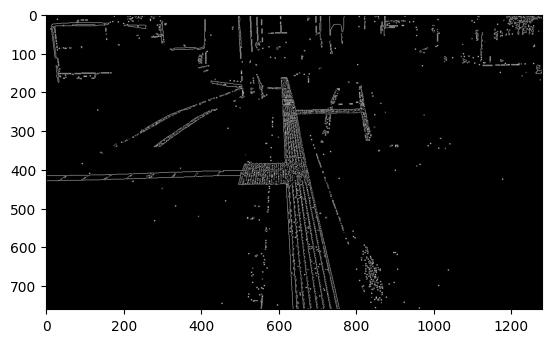

In [474]:
canny = cv2.Canny(seg, 0, 0)
plt.imshow(canny)


cnts, hierachy = cv2.findContours(seg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#largest_contour = max(cnts, key=cv2.contourArea)

# Draw the largest contour on the original image
out = cv2.merge((img, img, img))
#cv2.drawContours(out, [largest_contour], -1, [255,0,0], 2)
cv2.drawContours(out, cnts, -1, [255,0,0], 2)
plt.imshow(out)


mask = np.zeros(img.shape[:2], dtype=np.uint8)

# Fill the contours in the mask with white color
cv2.drawContours(mask, cnts, -1, 255, -1)

# Apply the mask to the original image using bitwise AND operation
result = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)
plt.imshow(result)

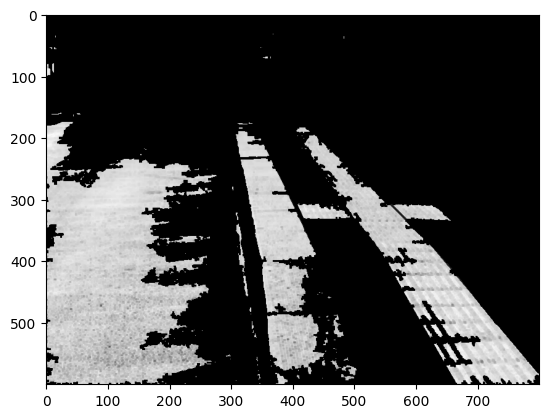

In [459]:
fin = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
fin = cv2.erode(fin, np.ones((3,3)),iterations=1 )
plt.imshow(fin)



bw_new = cv2.dilate(canny ,np.ones((10,2)), iterations=1) #4
cnts, hierachy = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
out = cv2.merge((img, img, img))
cv2.drawContours(out, cnts, -1, [255,0,0], 2)
plt.imshow(out)


(760, 1280)

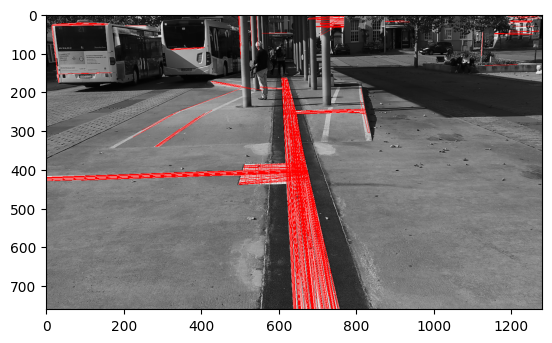

In [492]:
linesh = cv2.HoughLinesP(seg, 1, np.pi/180, 60,
                        minLineLength=50, maxLineGap=25)

lines=np.squeeze(linesh)
img_rgb = cv2.merge((img, img, img))
img_2 = img.copy()
for (x1,y1,x2,y2) in lines:
    cv2.line(img_rgb, (x1,y1), (x2,y2), (255,0,0))
plt.imshow(img_rgb)
img.shape


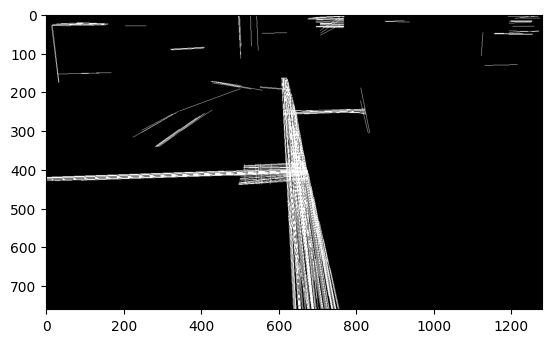

In [493]:
bw = np.zeros(np.shape(img))
for (x1,y1,x2,y2) in lines:
    cv2.line(bw, (x1,y1), (x2,y2), (255,0,0))
plt.imshow(bw)

#gauss = cv2.GaussianBlur(bw, None, 2)
#plt.imshow(gauss)
bw = bw.astype("uint8")

nr, labels = cv2.connectedComponents(bw)
plt.imshow(labels == 0) #labels==1 streifen


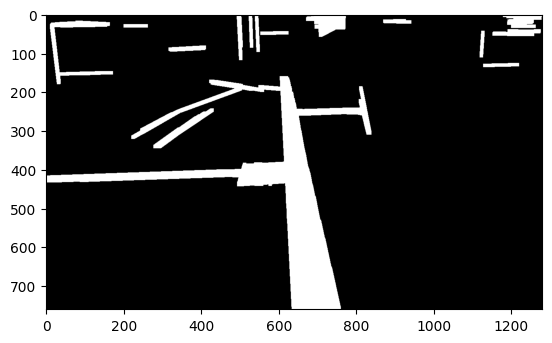

In [497]:
bw_new = cv2.dilate(bw ,np.ones((3,3)), iterations=4) #4
plt.imshow(bw_new)

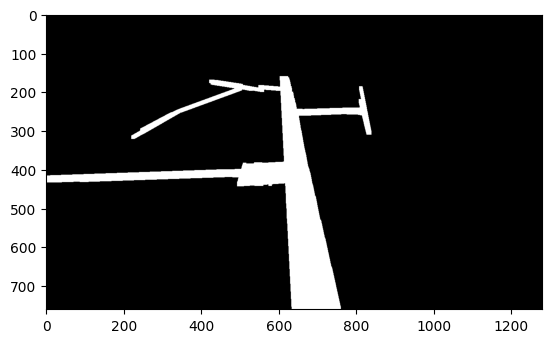

In [515]:
nr, labels = cv2.connectedComponents(bw_new.astype('uint8'))
bw_connect = (labels==14) * 1
plt.imshow(bw_connect)


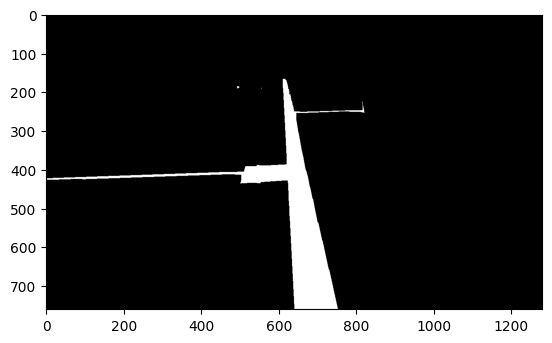

In [524]:
bw_connect_new = cv2.erode(bw_connect.astype('uint8'), np.ones((3,3)), iterations=7) #7
plt.imshow(bw_connect_new)

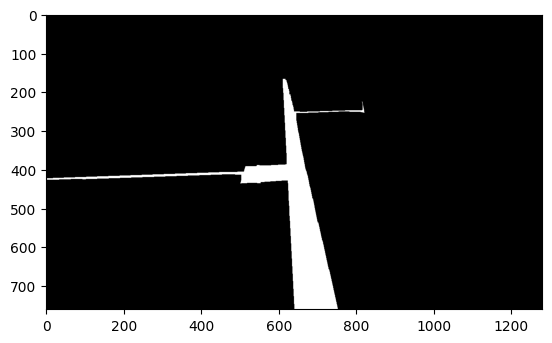

In [525]:
nr, labels = cv2.connectedComponents(bw_connect_new)
bw_final = (labels==1) * 1 #2 streifen
plt.imshow(bw_final)


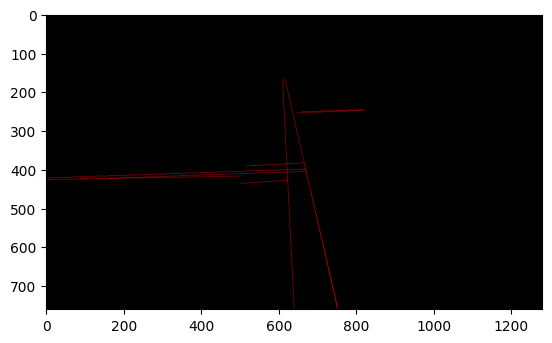

In [526]:
bw_final_c = cv2.Canny(bw_final.astype('uint8'), 0, 0)
plt.imshow(bw_final_c)
linesh = cv2.HoughLinesP(bw_final_c, 1, np.pi/180, 60,
                       minLineLength=100, maxLineGap=1000)

lines=np.squeeze(linesh)
final = cv2.merge((bw_final, bw_final, bw_final))
for (x1,y1,x2,y2) in lines:
    cv2.line(final, (x1,y1), (x2,y2), (255,0,0))
plt.imshow(final)


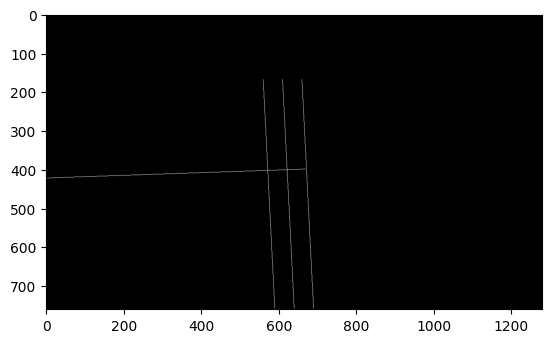

In [527]:
# find the longes line in x and y 
diffx = []
diffy = []
for (x1,y1,x2,y2) in lines:
    diffx.append(x2-x1)
    diffy.append(y2-y1)
diffx.index(max(diffx))
llinex = lines[diffx.index(max(diffx))]
lliney = lines[diffy.index(max(diffy))]
blank = np.zeros(img.shape, dtype=np.uint8)
blank = cv2.line(blank, (llinex[0],llinex[1]), (llinex[2],llinex[3]), (255,255,255))
blank = cv2.line(blank, (lliney[0],lliney[1]), (lliney[2],lliney[3]), (255,255,255))
blank = cv2.line(blank, (lliney[0]-50,lliney[1]), (lliney[2]-50,lliney[3]), (255,255,255))
blank = cv2.line(blank, (lliney[0]+50,lliney[1]), (lliney[2]+50,lliney[3]), (255,255,255))
plt.imshow(blank)


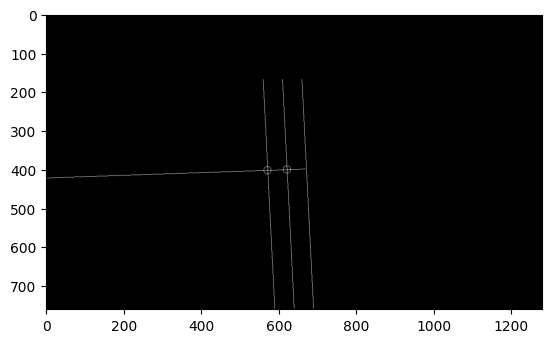

In [528]:
#find intersections from script with offset line 
# so we get two/three intersections left and rigth from the "masterline"
def find_intersection(l1, l2, offset):
    x1=l1[0]; y1=l1[1]
    x2=l1[2]; y2=l1[3]
    x3=l2[0]+offset; y3=l2[1]
    x4=l2[2]+offset; y4=l2[3]
    denom=(x1-x2)*(y3-y4) - (y1-y2)*(x3-x4)
    #print(denom)
    if(denom):
        px=((x1*y2-y1*x2)*(x3-x4) - (x1-x2)*(x3*y4-y3*x4))/denom 
        py=((x1*y2-y1*x2)*(y3-y4) - (y1-y2)*(x3*y4-y3*x4))/denom
    else: 
        px=-1
        py=-1
    return (px,py)
sy,sx=img.shape
px=[]
py=[]
for x in range(-50,50,50):
    p=find_intersection(llinex,lliney,x)
    if(p[0]>0 and p[0]<sx and p[1]>0 and p[1]<sy):
        px.append(p[0])
        py.append(p[1])

#res = final.copy()
for x in range(len(px)):
    blank = cv2.circle(blank, (px[x].astype('int'), py[x].astype('int')),10, [255,255,255])
plt.imshow(blank)


In [523]:
#line to right or left
if px[0] - px[1] < 0: 
    print("go left")
elif px[0] - px[1] < 0: 
    print("go right")
if len(px) > 2:
    print("you can go left or right") 


go left


In [ ]:
# lines with offset in blank 
blank = np.zeros(img.shape, dtype=np.uint8)
cv2.line(blank, (lliney[0],lliney[1]), (lliney[2],lliney[3]), (255,255,255))
cv2.line(blank, (lliney[0]-10,lliney[1]), (lliney[2]-10,lliney[3]), (255,255,255))
cv2.line(blank, (lliney[0]-50,lliney[1]), (lliney[2]-50,lliney[3]), (255,255,255))
cv2.line(blank, (lliney[0]-100,lliney[1]), (lliney[2]-100,lliney[3]), (255,255,255))
plt.imshow(blank)
# find all points of the line
points = cv2.findNonZero(blank)

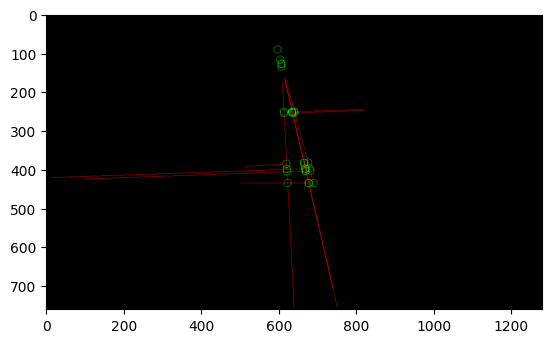

In [63]:
#find intersections from script
def find_intersection(l1, l2):
    x1=l1[0]; y1=l1[1]
    x2=l1[2]; y2=l1[3]
    x3=l2[0]; y3=l2[1]
    x4=l2[2]; y4=l2[3]
    denom=(x1-x2)*(y3-y4) - (y1-y2)*(x3-x4)
    #print(denom)
    if(denom):
        px=((x1*y2-y1*x2)*(x3-x4) - (x1-x2)*(x3*y4-y3*x4))/denom 
        py=((x1*y2-y1*x2)*(y3-y4) - (y1-y2)*(x3*y4-y3*x4))/denom
    else: 
        px=-1
        py=-1
    return (px,py)
sy,sx=img.shape
px=[]
py=[]
for i in range(len(lines)):
    for j in range(i,len(lines)):
        p=find_intersection(lines[i], lines[j])
        if(p[0]>0 and p[0]<sx and p[1]>0 and p[1]<sy):
            px.append(p[0])
            py.append(p[1])

res = final.copy()
for x in range(len(px)):
    res = cv2.circle(res.astype('uint8'), (px[x].astype('int'), py[x].astype('int')),10, [0,255,0])
plt.imshow(res)
